# Optimizers: SGD, Adam, and More | محسّنات: SGD و Adam والمزيد

## 📚 Prerequisites (What You Need First) | المتطلبات الأساسية

**BEFORE starting this notebook**, you should have completed:
- ✅ **Module 02: Calculus** - Understand gradients and gradient descent
- ✅ **Example 3: Gradient Descent** - Understand basic optimization
- ✅ **Basic understanding**: What is optimization?

**If you haven't completed these**, you might struggle with:
- Understanding why different optimizers exist
- Understanding momentum and adaptive learning rates
- Comparing optimizer performance

---

## 🔗 Where This Notebook Fits | مكان هذا الدفتر

**This is the FIRST example of Module 03** - improving on basic gradient descent!

**Why this example FIRST?**
- **Before** you can use advanced optimizers, you need to understand basic gradient descent (Module 02)
- **Before** you can train complex models, you need efficient optimizers
- **Before** you can tune hyperparameters, you need to understand optimizer differences

**Builds on**: Module 02 (gradient descent)

**Leads to**: 
- 📓 Example 2: Loss Functions (needs optimizers to minimize them)
- 📓 Example 3: Statistical Measures (needs optimizers to train models)

---

## The Story: Understanding Before Using | القصة: الفهم قبل الاستخدام

Imagine you're learning to drive. **Before** you can drive efficiently, you learn basic steering. **After** learning advanced techniques (momentum, adaptive speed), you can drive much more smoothly and efficiently!

Same with machine learning: **Before** using basic gradient descent, training is slow. **After** learning advanced optimizers (Adam, SGD with momentum), training is faster and more stable!

---

## Why This Concept Matters | لماذا يهم هذا المفهوم؟

### Why Optimizers Matter in ML

**WHY** are different optimizers important?

1. **Training Speed**:
   - **WHY**: Basic gradient descent is slow
   - **HOW**: Advanced optimizers use momentum and adaptive learning rates
   - **AFTER**: Much faster convergence

2. **Stability**:
   - **WHY**: Noisy gradients can cause instability
   - **HOW**: Optimizers smooth out noise with momentum
   - **AFTER**: More stable training

3. **Adaptability**:
   - **WHY**: Different parameters need different learning rates
   - **HOW**: Adaptive optimizers adjust learning rate per parameter
   - **AFTER**: Better convergence for complex models

**Common Student Questions:**
- **Q: Why use Adam instead of basic gradient descent?**
  - Answer: Adam = adaptive learning rate + momentum → faster, more stable
  - Basic GD: Same learning rate for all parameters, no momentum → slow
  - Adam: Different learning rate per parameter, momentum → faster convergence
  - Rule of thumb: Use Adam for most cases (default choice)
- **Q: What is momentum in optimizers?**
  - Answer: Momentum = remembers previous gradient direction
  - Like ball rolling downhill: Momentum keeps it moving in same direction
  - Helps: Skip over small bumps, converge faster
  - Without momentum: Each step independent → slower, can get stuck
  - With momentum: Steps build on each other → faster convergence
- **Q: What is adaptive learning rate?**
  - Answer: Adaptive = learning rate changes per parameter
  - Problem: Some parameters need small steps, others need large steps
  - Solution: Adam adjusts learning rate based on gradient history
  - Example: Parameter with large gradients → smaller learning rate, small gradients → larger learning rate
  - Result: Better convergence for all parameters
- **Q: When should I use SGD vs Adam?**
  - Answer: SGD = simple, good for convex problems, easier to tune
  - Adam = adaptive, good for non-convex problems (neural networks), less tuning needed
  - Use SGD when: Simple problems, want control over learning rate
  - Use Adam when: Complex problems (neural networks), want automatic tuning
  - Rule of thumb: Start with Adam, use SGD if Adam doesn't work
- **Q: Why are there so many optimizers?**
  - Answer: Different optimizers solve different problems
  - SGD: Simple, good baseline
  - Momentum: Faster convergence
  - Adam: Adaptive, good default
  - RMSprop: Similar to Adam, sometimes better
  - Each has trade-offs: Speed vs stability vs simplicity

## Learning Objectives | أهداف التعلم
1. Understand different optimizers (SGD, Adam)
2. Understand momentum and adaptive learning rates
3. Compare optimizer performance
4. Visualize optimizer convergence
5. Choose the right optimizer for your problem
6. Apply to real ML scenarios

---

## Step 1: Import necessary libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt

print('✅ Libraries imported successfully!')

✅ Libraries imported successfully!


---

## Part 1: Setting the Scene | الجزء الأول: إعداد المشهد

**BEFORE**: We understand basic gradient descent but it's slow and unstable.

**AFTER**: We'll learn advanced optimizers that are faster and more stable!

**Why this matters**: Advanced optimizers are essential for training modern ML models!

## Step 2: Simple Gradient Descent | الخطوة 2: نزول التدرج البسيط

**BEFORE**: We start with basic gradient descent.

**AFTER**: We'll see its limitations and why we need better optimizers!

In [2]:
# Example 1: Simple Gradient Descent
# WHY: Baseline to compare against
# HOW: params = params - lr × gradient

def simple_gd(x, grad, lr=0.1):
    """Simple gradient descent update"""
    return x - lr * grad

def loss_function(x):
    """Noisy loss function"""
    return (x - 3)**2 + 0.1 * np.sin(10*x)

def loss_gradient(x):
    """Gradient with noise"""
    return 2 * (x - 3) + 0.1 * 10 * np.cos(10*x)

# Simple GD
x_simple = 0.0
simple_path = [x_simple]
simple_loss = [loss_function(x_simple)]

for i in range(30):
    grad = loss_gradient(x_simple)
    x_simple = simple_gd(x_simple, grad, lr=0.1)
    simple_path.append(x_simple)
    simple_loss.append(loss_function(x_simple))

print("Example 1: Simple Gradient Descent")
print("=" * 60)
print(f"Starting at x = 0.0")
print(f"After 30 iterations: x = {x_simple:.4f}, loss = {simple_loss[-1]:.4f}")
print(f"\n💡 WHY: Simple, works for smooth functions")
print(f"💡 HOW: params = params - lr × gradient")
print(f"💡 AFTER: Can be slow and unstable with noise")

Example 1: Simple Gradient Descent
Starting at x = 0.0
After 30 iterations: x = 2.5028, loss = 0.2368

💡 WHY: Simple, works for smooth functions
💡 HOW: params = params - lr × gradient
💡 AFTER: Can be slow and unstable with noise


## Step 3: Adam Optimizer | الخطوة 3: محسّن Adam

**BEFORE**: Simple GD is slow and unstable.

**AFTER**: Adam uses momentum and adaptive learning rates for better performance!

In [3]:
# Example 2: Adam Optimizer
# WHY: Adapts to each parameter, handles noise better
# HOW: Tracks momentum + variance, adapts learning rate

class AdamOptimizer:
    def __init__(self, lr=0.1, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1  # Momentum decay
        self.beta2 = beta2  # Learning rate decay
        self.m = 0  # First moment (mean of gradients)
        self.v = 0  # Second moment (variance of gradients)
        self.t = 0  # Time step
    
    def update(self, params, grads):
        self.t += 1
        self.m = self.beta1 * self.m + (1 - self.beta1) * grads  # Momentum
        self.v = self.beta2 * self.v + (1 - self.beta2) * grads**2  # Variance
        m_hat = self.m / (1 - self.beta1**self.t)  # Bias correction
        v_hat = self.v / (1 - self.beta2**self.t)  # Bias correction
        return params - self.lr * m_hat / (np.sqrt(v_hat) + 1e-8)  # Adaptive step

# Adam optimizer
adam = AdamOptimizer(lr=0.1)
x_adam = 0.0
adam_path = [x_adam]
adam_loss = [loss_function(x_adam)]

for i in range(30):
    grad = loss_gradient(x_adam)
    x_adam = adam.update(x_adam, grad)
    adam_path.append(x_adam)
    adam_loss.append(loss_function(x_adam))

print("\nExample 2: Adam Optimizer")
print("=" * 60)
print(f"Starting at x = 0.0")
print(f"After 30 iterations: x = {x_adam:.4f}, loss = {adam_loss[-1]:.4f}")
print(f"\n💡 WHY: Adapts to each parameter, handles noise better")
print(f"💡 HOW: Tracks momentum + variance, adapts learning rate")
print(f"💡 AFTER: Faster convergence, more stable!")


Example 2: Adam Optimizer
Starting at x = 0.0
After 30 iterations: x = 2.5753, loss = 0.2385

💡 WHY: Adapts to each parameter, handles noise better
💡 HOW: Tracks momentum + variance, adapts learning rate
💡 AFTER: Faster convergence, more stable!


---

## 📊 Visualization | التصور


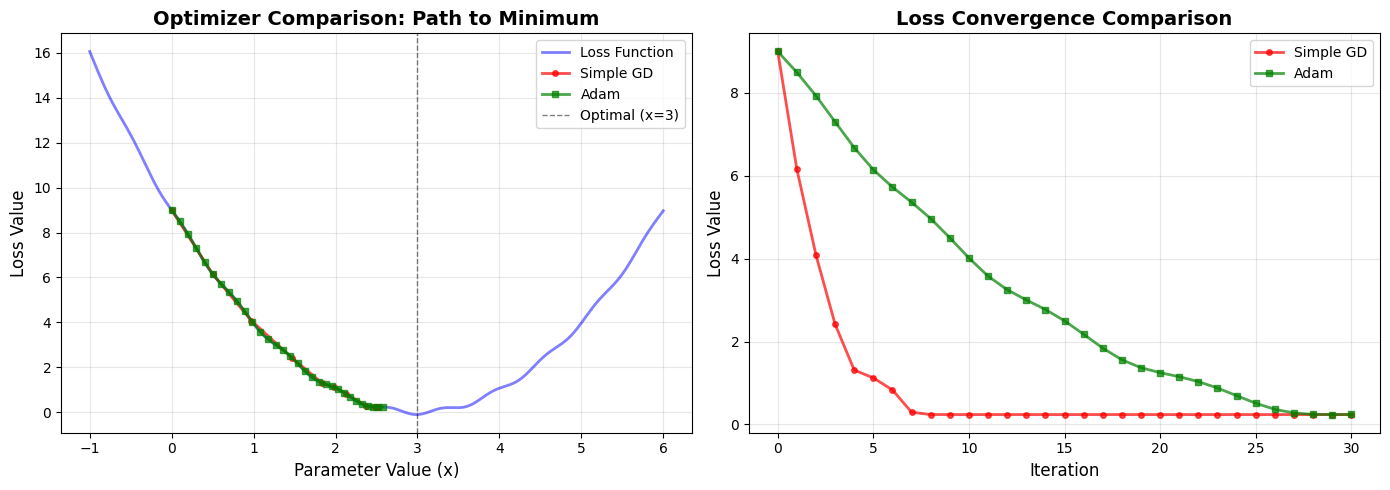


📊 Visualization:
  - Left: Shows optimizer paths on loss landscape
  - Right: Shows loss convergence over iterations
  - Adam converges faster and more smoothly!


In [4]:
# Visualize optimizer comparison
x_range = np.linspace(-1, 6, 200)
y_range = [loss_function(x) for x in x_range]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Loss landscape with optimizer paths
ax1.plot(x_range, y_range, 'b-', linewidth=2, alpha=0.5, label='Loss Function')
ax1.plot(simple_path, simple_loss, 'r-o', linewidth=2, markersize=4, label='Simple GD', alpha=0.7)
ax1.plot(adam_path, adam_loss, 'g-s', linewidth=2, markersize=4, label='Adam', alpha=0.7)
ax1.axvline(x=3, color='k', linestyle='--', linewidth=1, alpha=0.5, label='Optimal (x=3)')
ax1.set_xlabel('Parameter Value (x)', fontsize=12)
ax1.set_ylabel('Loss Value', fontsize=12)
ax1.set_title('Optimizer Comparison: Path to Minimum', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Convergence over iterations
ax2.plot(range(len(simple_loss)), simple_loss, 'r-o', linewidth=2, markersize=4, label='Simple GD', alpha=0.7)
ax2.plot(range(len(adam_loss)), adam_loss, 'g-s', linewidth=2, markersize=4, label='Adam', alpha=0.7)
ax2.set_xlabel('Iteration', fontsize=12)
ax2.set_ylabel('Loss Value', fontsize=12)
ax2.set_title('Loss Convergence Comparison', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Visualization:")
print("  - Left: Shows optimizer paths on loss landscape")
print("  - Right: Shows loss convergence over iterations")
print("  - Adam converges faster and more smoothly!")

---

## Part 3: AFTER - Results and Implications | الجزء الثالث: بعد - النتائج والآثار

### What This Enables

**AFTER** understanding optimizers:

1. **Faster Training**: Can train models much faster
2. **Better Convergence**: More stable and reliable training
3. **Complex Models**: Can train deep neural networks efficiently
4. **Next Steps**: Learn loss functions (Example 2) and statistical measures (Example 3)

---

## 🎯 Summary: What We Learned | الملخص: ما تعلمناه

**BEFORE this notebook**: We only knew basic gradient descent.

**AFTER this notebook**: We can:
- ✅ Understand WHY different optimizers exist
- ✅ Implement HOW optimizers work (Adam)
- ✅ See what happens AFTER (faster convergence)

**Next Steps**: 
- 📓 Example 2: Loss Functions (what optimizers minimize)
- 📓 Example 3: Statistical Measures (how to evaluate trained models)

---

## ✅ Example Complete! | اكتمل المثال!
